Methodology (Briefly)

1. Implement using basic KNN model
2. Implement using hybrid recoomendation approach
3. Implement using surprise library which is purposely developed for recommendation system


Note:

The 1st and 2nd methods are implemented in order to try out a more simplistic approach to the problem.

The real approach which is commonly use and have a fairly good efficiency is the 3rd method, which will be used to answer the questions.

<h3><b>Basic KNN using Cosine similarity matrix

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv('movie_genres.csv')
movies_df.set_index('movie_title',inplace=True)
movies_df.head()

,Unnamed: 0,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,...,genre_mystery,genre_news,genre_reality-tv,genre_romance,genre_sci-fi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
movie_title,,,,,,,,,,,,,,,,,,,,,
The Net,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
Happily N'Ever After,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Tomorrowland,2,1,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
American Hero,3,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Das Boot,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [3]:
movies_df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
ratings_df = pd.read_csv('user_reviews.csv')
ratings_df.set_index('User',inplace=True)
ratings_df.head()

,Unnamed: 0,The Net,Happily N'Ever After,Tomorrowland,American Hero,Das Boot,Final Destination 3,Licence to Kill,The Hundred-Foot Journey,The Matrix,...,The Martian,Micmacs,Solomon and Sheba,In the Company of Men,Silent House,Big Fish,Get Real,Trading Places,DOA: Dead or Alive,Hey Arnold! The Movie
User,,,,,,,,,,,,,,,,,,,,,
Vincent,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edgar,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Addilyn,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marlee,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javier,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ratings_df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
null_count = movies_df.isna().sum()
print(null_count[null_count > 0])

Series([], dtype: int64)


In [7]:
null_count = ratings_df.isna().sum()
print(null_count[null_count > 0])

Series([], dtype: int64)


<h4>For the simpliest case, if there's a new user coming in and we know nothing about this person, we could probably recommend some movie that has the highest ratings from the top 5/10 genres

In [8]:
genres_sum = movies_df.sum().sort_values(ascending=False)
genres_sum

genre_drama          1007
genre_comedy          763
genre_thriller        541
genre_romance         464
genre_action          456
genre_adventure       368
genre_crime           330
genre_sci-fi          263
genre_fantasy         251
genre_horror          230
genre_family          198
genre_mystery         195
genre_biography       114
genre_animation        95
genre_music            81
genre_war              80
genre_sport            70
genre_history          67
genre_musical          55
genre_documentary      45
genre_western          36
genre_film-noir         4
genre_news              2
genre_short             2
genre_reality-tv        1
dtype: int64

<AxesSubplot:>

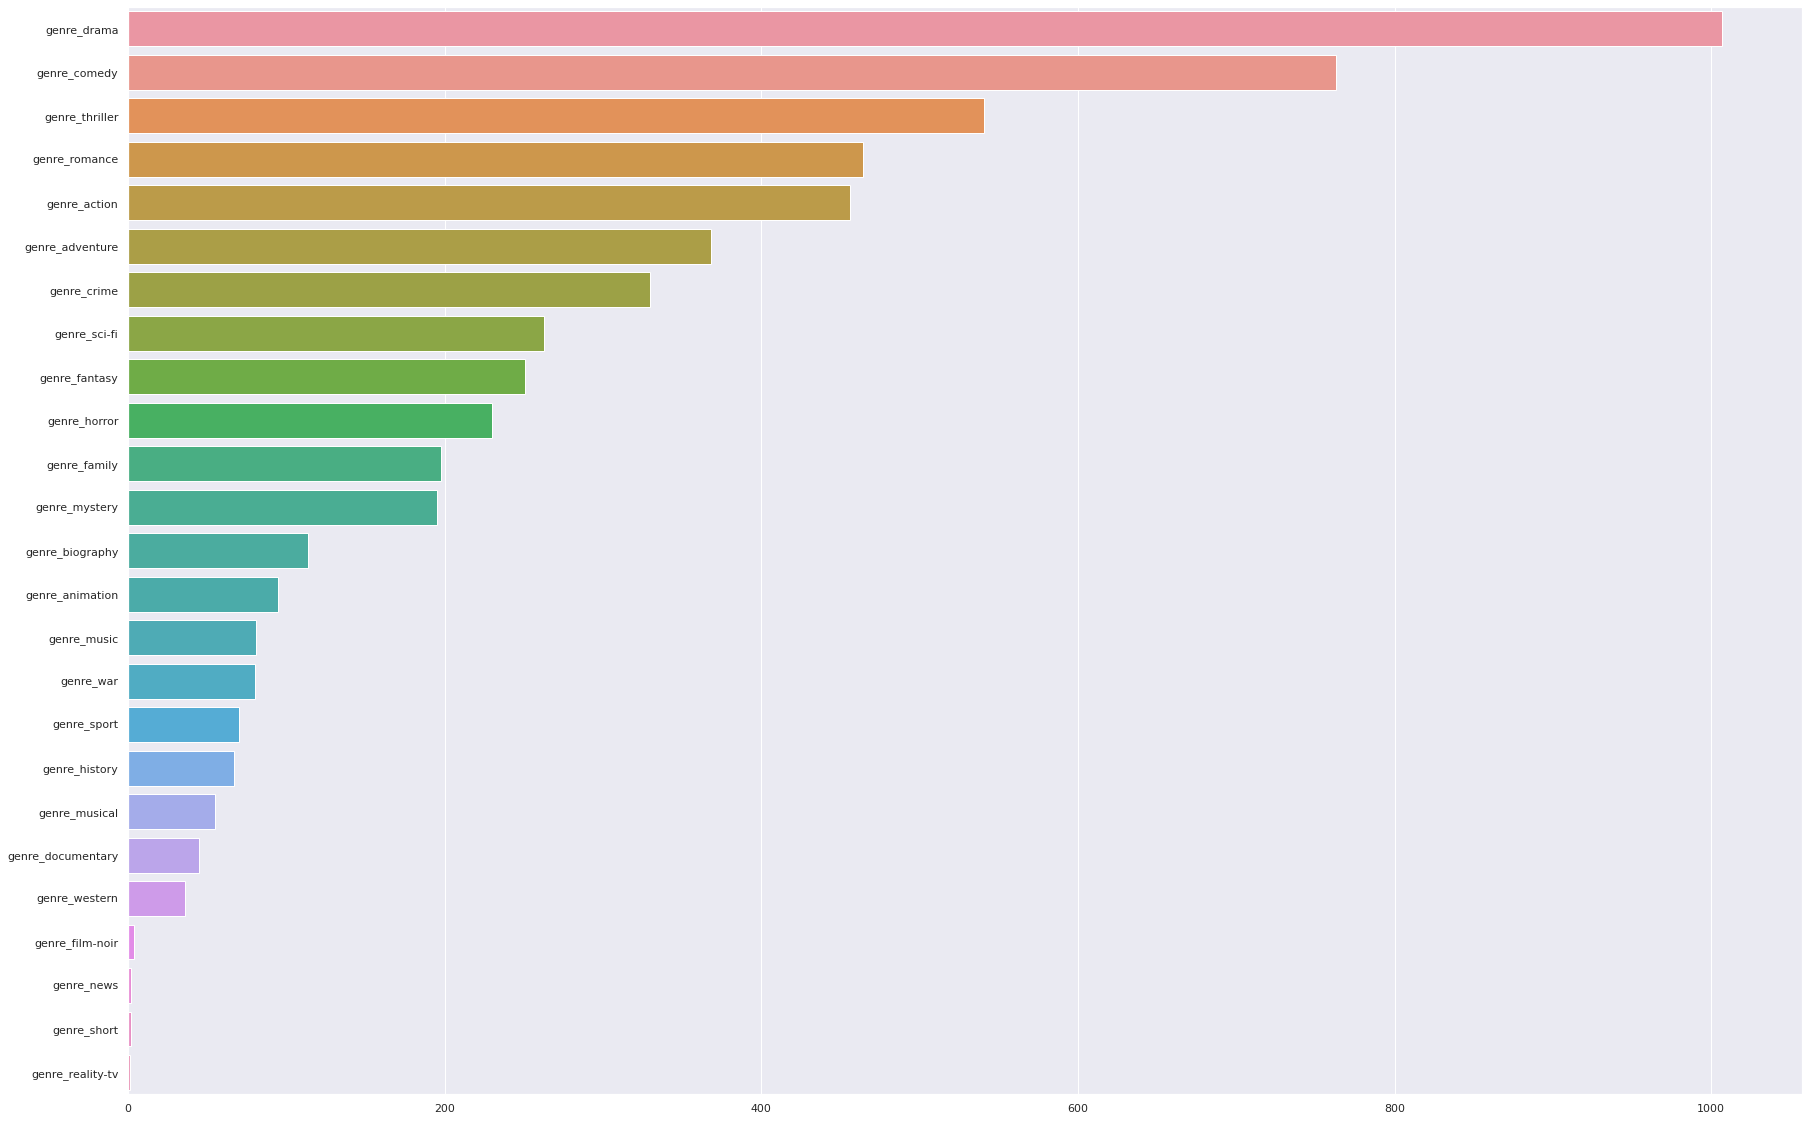

In [9]:
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(x=genres_sum.values,y=genres_sum.index)

<h>Note: 

Interpretation of Cosine Similarity -> the higher the value, the closer the movies are to each others. 

More information can be found at https://www.geeksforgeeks.org/cosine-similarity/

<h4><i>KNN recommendation of a similar movies using the similarity in genres

In [10]:
from scipy.sparse import csr_matrix
movies_df_matrix = csr_matrix(movies_df.values)

In [11]:
from sklearn.neighbors import NearestNeighbors
model_knn_genres = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn_genres.fit(movies_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [12]:
query_index = np.random.choice(movies_df.shape[0])
print(query_index)
distances_genres, indices_genres = model_knn_genres.kneighbors(movies_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

476


In [13]:
for i in range(0, len(distances_genres.flatten())):
    if i == 0:
        print('Recommendations for {0} based on similar genres:\n'.format(movies_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of :{2}'.format(i, movies_df.index[indices_genres.flatten()[i]], distances_genres.flatten()[i]))

Recommendations for Twisted based on similar genres:

1: Premonition, with distance of :0.0
2: Pi, with distance of :0.0
3: Twisted, with distance of :0.0
4: The Game, with distance of :0.0
5: The Life Before Her Eyes, with distance of :0.0


<h4>Recommend 5 movies for the first 5 users in the data, that they haven't rated already (using similarity in genres)

In this case, we choose to recommend 5 movies based on the movies that has a similar genres with the highest rated movie by each users.

In case of more than 1 highest rated movies, we randomly select the movie that will be the based of our recommendation system.

In [14]:
first_five_users = ['Vincent','Edgar', 'Addilyn', 'Marlee','Javier']
for user in first_five_users: 
    user_ratings = pd.DataFrame(ratings_df.loc[user].sort_values(ascending=False))
    max_rating = user_ratings[user].max()
    top_movies = user_ratings.loc[user_ratings[user]==max_rating]
    selected_base = top_movies.sample(n=1,random_state=1)
    index_positions = movies_df.index == selected_base.index[0]
    result_positions = index_positions.nonzero()[0]
    query_index = result_positions[0]
    movies_df_matrix = csr_matrix(movies_df.drop(top_movies.index.tolist()).values)
    model_knn_genres = NearestNeighbors(metric='cosine',algorithm='brute')
    model_knn_genres.fit(movies_df_matrix)
    distances_genres, indices_genres = model_knn_genres.kneighbors(movies_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances_genres.flatten())):
        if i == 0:
            print('Recommendations for {0} based on similar genres with {1}:\n'.format(user,movies_df.index[query_index]))
        else:
            print('{0}: {1}'.format(i, movies_df.index[indices_genres.flatten()[i]]))
    print('\n')

Recommendations for Vincent based on similar genres with Stone Cold:

1: The Amazing Catfish
2: House of Flying Daggers
3: Ghost Dog: The Way of the Samurai
4: Cleopatra
5: Get Hard


Recommendations for Edgar based on similar genres with Fahrenheit 9/11:

1: Scrooged
2: Blade
3: Wolves
4: Contagion
5: Half Past Dead


Recommendations for Addilyn based on similar genres with That Thing You Do!:

1: Collateral
2: Mozart's Sister
3: Survivor
4: Adam Resurrected
5: La Famille Bélier


Recommendations for Marlee based on similar genres with Now You See Me 2:

1: I Love You Phillip Morris
2: Original Sin
3: Pirates of the Caribbean: Dead Man's Chest
4: Life During Wartime
5: Mutual Appreciation


Recommendations for Javier based on similar genres with The Emperor's New Groove:

1: Palo Alto
2: Monsters, Inc.
3: Quarantine
4: The SpongeBob SquarePants Movie
5: Valentine's Day




<h4><i>KNN recommendation of a similar movies using the similarity in ratings provided by the users

In [15]:
movies_ratings_df = ratings_df.T

In [16]:
movies_ratings_df.head()

User,Vincent,Edgar,Addilyn,Marlee,Javier,Marcus,Mary,Rosalie,Giovanni,Kennedi,...,Piper,Tatum,Jonah,Nylah,James,Mariana,Ivy,Kevin,Nora,Sarai
The Net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
Happily N'Ever After,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomorrowland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Hero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Das Boot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from scipy.sparse import csr_matrix
movies_ratings_df_matrix = csr_matrix(movies_ratings_df.values)

In [18]:
from sklearn.neighbors import NearestNeighbors
model_knn_ratings = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn_ratings.fit(movies_ratings_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
query_index = np.random.choice(movies_ratings_df.shape[0])
distances_ratings, indices_ratings = model_knn_ratings.kneighbors(movies_ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [20]:
for i in range(0, len(distances_ratings.flatten())):
    if i == 0:
        print('Recommendations for {0} based on similar ratings by the users:\n'.format(movies_ratings_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of :{2}'.format(i, movies_ratings_df.index[indices_ratings.flatten()[i]], distances_ratings.flatten()[i]))

Recommendations for The Perks of Being a Wallflower based on similar ratings by the users:

1: Restoration, with distance of :0.7380315840022081
2: Love in the Time of Cholera, with distance of :0.7414561550024905
3: Heavenly Creatures, with distance of :0.7427521222862368
4: Remember the Titans, with distance of :0.7475609178512994
5: Kiss of the Dragon, with distance of :0.7566631906838465


<h4>Recommend 5 movies for the first 5 users in the data, that they haven't rated already (using similarity in ratings)

In this case, we choose to recommend 5 movies based on the movies that are likely to have a similar ratings with the highest rated movie by that user.

In case of more than 1 highest rated movies, we randomly select the movie that will be the based of our recommendation system.

In [21]:
#Still missing the haven't seen before part
first_five_users = ['Vincent','Edgar', 'Addilyn', 'Marlee','Javier']
for user in first_five_users: 
    user_ratings = pd.DataFrame(ratings_df.loc[user].sort_values(ascending=False))
    max_rating = user_ratings[user].max()
    top_movies = user_ratings.loc[user_ratings[user]==max_rating]
    selected_base = top_movies.sample(n=1,random_state=1)
    index_positions = movies_df.index == selected_base.index[0]
    result_positions = index_positions.nonzero()[0]
    query_index = result_positions[0]
    movies_df_matrix = csr_matrix(movies_ratings_df.drop(top_movies.index.tolist()).values)
    model_knn_genres = NearestNeighbors(metric='cosine',algorithm='brute')
    model_knn_genres.fit(movies_df_matrix)
    distances_genres, indices_genres = model_knn_genres.kneighbors(movies_ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances_genres.flatten())):
        if i == 0:
            print('Recommendations for {0} based on similar ratings with {1}:\n'.format(user,movies_ratings_df.index[query_index]))
        else:
            print('{0}: {1}'.format(i, movies_ratings_df.index[indices_genres.flatten()[i]]))
    print('\n')

Recommendations for Vincent based on similar ratings with Stone Cold:

1: Happy Feet 2
2: The Boys from Brazil
3: The Secret Life of Pets
4: Unfaithful
5: Rodeo Girl


Recommendations for Edgar based on similar ratings with Fahrenheit 9/11:

1: A Madea Christmas
2: Certifiably Jonathan
3: Sicko
4: The Business of Fancydancing
5: Hardball


Recommendations for Addilyn based on similar ratings with That Thing You Do!:

1: Outside Providence
2: A Sound of Thunder
3: Rosemary's Baby
4: Saving Private Perez
5: Doom


Recommendations for Marlee based on similar ratings with Now You See Me 2:

1: Be Cool
2: City of Ghosts
3: Nowhere to Run
4: Dracula Untold
5: Thirteen


Recommendations for Javier based on similar ratings with The Emperor's New Groove:

1: The Smurfs 2
2: Perfume: The Story of a Murderer
3: The Ugly Truth
4: The Sitter
5: Prometheus




<h3><b>Hybrid recommendation approach using both genres data and ratings provided by the users

In [22]:
movies_df.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,...,genre_mystery,genre_news,genre_reality-tv,genre_romance,genre_sci-fi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
movie_title,,,,,,,,,,,,,,,,,,,,,
The Net,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
Happily N'Ever After,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Tomorrowland,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
American Hero,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Das Boot,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [23]:
movies_ratings_df.index.names = ['movie_title']
movies_ratings_df.head()

User,Vincent,Edgar,Addilyn,Marlee,Javier,Marcus,Mary,Rosalie,Giovanni,Kennedi,...,Piper,Tatum,Jonah,Nylah,James,Mariana,Ivy,Kevin,Nora,Sarai
movie_title,,,,,,,,,,,,,,,,,,,,,
The Net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
Happily N'Ever After,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomorrowland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Hero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Das Boot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
combined_data = movies_df.merge(movies_ratings_df,how='left',on='movie_title')

In [25]:
null_check = combined_data.isna().sum()
print(null_check[null_check > 0])

Series([], dtype: int64)


In [26]:
merge_check = combined_data.index.value_counts()
print(merge_check[merge_check != 1])

Series([], Name: movie_title, dtype: int64)


In [27]:
query_index = 0
movies_df_matrix = csr_matrix(movies_df.values)
model_knn_genres = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn_genres.fit(movies_df_matrix)
distances_genres, indices_genres = model_knn_genres.kneighbors(movies_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
movies_ratings_df_matrix = csr_matrix(movies_ratings_df.values)
model_knn_ratings = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn_ratings.fit(movies_ratings_df_matrix)
distances_ratings, indices_ratings = model_knn_ratings.kneighbors(movies_ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [28]:
for i in range(0, len(distances_genres.flatten())):
    if i == 0:
        print('Recommendations for {0} based on similar genres:\n'.format(movies_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of :{2}'.format(i, movies_df.index[indices_genres.flatten()[i]], distances_genres.flatten()[i]))

Recommendations for The Net based on similar genres:

1: Breakdown, with distance of :1.1102230246251565e-16
2: Shooter, with distance of :1.1102230246251565e-16
3: Enemy of the State, with distance of :1.1102230246251565e-16
4: Sicario, with distance of :1.1102230246251565e-16
5: The Negotiator, with distance of :1.1102230246251565e-16


In [29]:
for i in range(0, len(distances_ratings.flatten())):
    if i == 0:
        print('Recommendations for {0} based on similar ratings by the users:\n'.format(movies_ratings_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of :{2}'.format(i, movies_ratings_df.index[indices_ratings.flatten()[i]], distances_ratings.flatten()[i]))

Recommendations for The Net based on similar ratings by the users:

1: Taken 2, with distance of :0.7380439110575285
2: The Dead Undead, with distance of :0.7443552333954891
3: Dracula Untold, with distance of :0.7527155226887069
4: Lilo & Stitch, with distance of :0.760655434206853
5: Alex Cross, with distance of :0.7726794308727754


In [30]:
# weight_ratings = 1
# weight_genres = 0

# combined_distances = weight_ratings * distances_ratings + weight_genres * distances_genres
# combined_indices = np.unique(np.concatenate((indices_genres, indices_ratings)))

In [31]:
print(indices_genres,indices_ratings)
print(distances_genres)
print(distances_ratings)

[[ 539  986  832 1880 1014  229]] [[   0  307  700  838 1090  284]]
[[1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
  1.11022302e-16 1.11022302e-16]]
[[2.22044605e-16 7.38043911e-01 7.44355233e-01 7.52715523e-01
  7.60655434e-01 7.72679431e-01]]


In [32]:
indices_combined = indices_genres.tolist()[0]
distances_combined  = distances_genres.tolist()[0]
indices_ratings_list = indices_ratings.tolist()[0]
distances_ratings_list = distances_ratings.tolist()[0]

# indices_combined = [0,1,2]
# distances_combined = [0.5,0.6,0.7]
# indices_ratings_list = [0,2,3]
# distances_ratings_list = [0,0.4,1]
# print(indices_combined)
# print(distances_combined)
for j in indices_ratings_list:
    # print(j)
    if j in indices_combined:
        distances_combined[indices_combined.index(j)] = 0.3*distances_combined[indices_combined.index(j)] + 0.7*distances_ratings_list[indices_ratings_list.index(j)]
    else:
        indices_combined.append(j)
        distances_combined.append(0.7*distances_ratings_list[indices_ratings_list.index(j)])

print(indices_combined)
print(distances_combined)

[539, 986, 832, 1880, 1014, 229, 0, 307, 700, 838, 1090, 284]
[1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.554312234475219e-16, 0.5166307377402699, 0.5210486633768424, 0.5269008658820948, 0.532458803944797, 0.5408756016109427]


In [33]:
i = -1
while i < len(distances_combined):
    if i == -1:
        print('Recommendations for {0} based on similar ratings by the users:\n'.format(combined_data.index[query_index]))
        i += 1
        continue
    else:
        if combined_data.index[indices_combined[i]] == combined_data.index[query_index]:
            pass
        print('{0}: {1}, with distance of :{2}'.format(i+1, combined_data.index[indices_combined[i]], distances_combined[i]))
        i += 1
    if i >= 5:
        break

Recommendations for The Net based on similar ratings by the users:

1: Four Brothers, with distance of :1.1102230246251565e-16
2: Breakdown, with distance of :1.1102230246251565e-16
3: Shooter, with distance of :1.1102230246251565e-16
4: Enemy of the State, with distance of :1.1102230246251565e-16
5: Sicario, with distance of :1.1102230246251565e-16


Note: 

We need to find a more reliable way to determine the weight.

Because even though the genres data are important and will most likely to recommend the same kind of movies, 

it doesn't take into account the fact that even the movies are classified as the same genres, 

they might have a really big difference in the plot and how they execute the story telling process. 

But we won't be tackle this problem in this workbook.

Note2: 

Since we need to find a way to determine the weight that is good enough for the problem, we won't do the prediction for this method

<h3><b>Matrix factorization-based algorithm

This is a class of collaborative filtering method and it's a more effective way that've been made popular by the Netflix Prize Challenge

Note: For a more clear and concise explanation, please take a look in the PDF

In [34]:
ratings_df

movie_title,The Net,Happily N'Ever After,Tomorrowland,American Hero,Das Boot,Final Destination 3,Licence to Kill,The Hundred-Foot Journey,The Matrix,Creature,...,The Martian,Micmacs,Solomon and Sheba,In the Company of Men,Silent House,Big Fish,Get Real,Trading Places,DOA: Dead or Alive,Hey Arnold! The Movie
User,,,,,,,,,,,,,,,,,,,,,
Vincent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edgar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Addilyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marlee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mariana,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ivy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kevin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from scipy.sparse import csr_matrix
R = csr_matrix(ratings_df.values)
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R 

In [36]:
R_demeaned

<600x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 16525 stored elements in Compressed Sparse Row format>

In [37]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
sigma = np.diag(sigma)

In [38]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings,index=ratings_df.index, columns = ratings_df.columns)

In [39]:
preds_df

movie_title,The Net,Happily N'Ever After,Tomorrowland,American Hero,Das Boot,Final Destination 3,Licence to Kill,The Hundred-Foot Journey,The Matrix,Creature,...,The Martian,Micmacs,Solomon and Sheba,In the Company of Men,Silent House,Big Fish,Get Real,Trading Places,DOA: Dead or Alive,Hey Arnold! The Movie
User,,,,,,,,,,,,,,,,,,,,,
Vincent,-0.317566,-0.541046,0.885287,-0.351349,0.109399,-0.004145,-0.015558,0.120005,0.160609,0.112386,...,0.019929,-0.412639,-0.382421,-0.310410,-0.222346,0.026509,0.391509,0.149441,-0.135584,0.016645
Edgar,0.207619,-0.384427,-0.106148,0.535188,-0.458955,-0.014375,0.025153,-0.064557,0.020500,0.484102,...,-0.119336,-0.033126,0.038555,0.287502,0.846105,-0.207735,-0.019951,-0.088241,0.118691,0.402790
Addilyn,-0.311805,0.094579,0.027342,0.261969,0.485085,0.183501,0.346572,0.100748,0.142678,-0.340272,...,-0.052053,-0.000806,-0.087738,0.509602,0.188762,0.005616,0.095809,-0.171429,0.083448,0.567902
Marlee,0.439692,0.235407,-0.136258,0.287719,0.348302,0.021905,0.183240,0.262262,0.103722,-0.010663,...,0.024499,-0.222382,-0.002315,0.008439,-0.159827,-0.012632,0.083069,-0.107587,-0.046711,-0.266901
Javier,0.295110,-0.047381,0.114502,0.401076,-0.024587,0.025256,-0.050428,0.018337,-0.073747,0.103897,...,0.023763,-0.104404,0.137322,0.158120,0.189332,0.220109,-0.075092,0.020343,-0.040209,0.222824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mariana,0.912813,0.060022,0.054505,-0.067930,0.426822,0.048819,-0.141376,-0.074834,0.022717,0.226995,...,0.110134,-0.023458,0.251081,0.122291,0.152678,0.149069,-0.002856,0.035313,0.047387,0.036030
Ivy,-0.028978,0.019188,-0.097330,-0.020049,0.222059,0.270785,-0.067199,-0.097084,0.025274,0.130433,...,0.057616,0.043953,0.453092,-0.000620,-0.184857,0.349949,-0.147786,0.029081,0.138703,0.209593
Kevin,0.554011,0.013862,0.187834,0.001218,0.128600,0.054568,0.158721,0.187181,0.011926,-0.018311,...,-0.071363,0.213839,-0.238064,0.082808,0.511454,0.071324,0.066048,0.118545,-0.024275,-0.037306


In [40]:
# ratings_df.reset_index(inplace=True)
# ratings_df = pd.melt(ratings_df,id_vars=['User'],value_vars=ratings_df.columns[ratings_df.columns != 'User'],var_name='movie_title',value_name='rating')

In [41]:
ratings_df

movie_title,The Net,Happily N'Ever After,Tomorrowland,American Hero,Das Boot,Final Destination 3,Licence to Kill,The Hundred-Foot Journey,The Matrix,Creature,...,The Martian,Micmacs,Solomon and Sheba,In the Company of Men,Silent House,Big Fish,Get Real,Trading Places,DOA: Dead or Alive,Hey Arnold! The Movie
User,,,,,,,,,,,,,,,,,,,,,
Vincent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edgar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Addilyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marlee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mariana,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ivy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kevin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [42]:
movies_df

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,...,genre_mystery,genre_news,genre_reality-tv,genre_romance,genre_sci-fi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
movie_title,,,,,,,,,,,,,,,,,,,,,
The Net,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
Happily N'Ever After,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Tomorrowland,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
American Hero,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Das Boot,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Big Fish,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Get Real,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Trading Places,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def movie_recommendation(list_users):
    for user in list_users:
        preds_df_temp = preds_df.loc[user].sort_values(ascending=False)
        non_zero_columns = ratings_df.loc[user][ratings_df.loc[user] != 0]
        mask = preds_df_temp.isin(non_zero_columns)
        result_series = preds_df_temp[~mask]
        result = result_series[:5].index
        # print(result_series[:5])
        print("5 Movies recommendation for {0} \n".format(user))
        for i in range(0,5):
            print("{0}".format(result[i]))
        print("-----------------------------\n")

In [44]:
list_users = ['Vincent','Edgar', 'Addilyn', 'Marlee','Javier']
movie_recommendation(list_users)

5 Movies recommendation for Vincent 

The Dangerous Lives of Altar Boys
The Importance of Being Earnest
Risen
The Curious Case of Benjamin Button
Across the Universe
-----------------------------

5 Movies recommendation for Edgar 

The Other End of the Line
A Scanner Darkly
Fahrenheit 9/11
New York, New York
Good Kill
-----------------------------

5 Movies recommendation for Addilyn 

Dysfunctional Friends
ATL
The Magic Sword: Quest for Camelot
Lilyhammer
That Thing You Do!
-----------------------------

5 Movies recommendation for Marlee 

Now You See Me 2
The Cabin in the Woods
Old Joy
Lilyhammer
When Harry Met Sally...
-----------------------------

5 Movies recommendation for Javier 

The Best Exotic Marigold Hotel
George and the Dragon
Perrier's Bounty
Adventureland
Dear John
-----------------------------

